# Our Implementation

In [1]:
import numpy as np

def compute_reaction_sol(x, t, rho): 
    initial_func_term = np.exp(-(1/2) * np.square((x - np.pi) / (np.pi / 4))).flatten()
    exp_term = np.exp(rho * t)
    
    return initial_func_term * exp_term / (initial_func_term * exp_term + 1 - initial_func_term)

In [2]:
x_range = [0, 2 * np.pi]
t_range = [0, 1]

x_num = 257
t_num = 101

rho = 5

x = np.linspace(x_range[0], x_range[1], x_num).reshape(-1, 1)
t = np.linspace(t_range[0], t_range[1], t_num).reshape(-1, 1)
x_mesh, t_mesh = np.meshgrid(x, t)
x_res = x_mesh.reshape(-1,1)
t_res = t_mesh.reshape(-1,1)

u = compute_reaction_sol(x, t, rho)

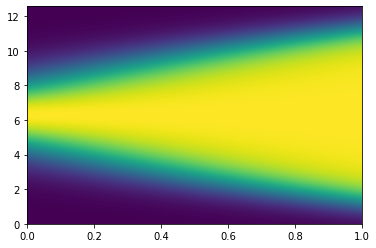

In [3]:
import matplotlib.pyplot as plt
plt.imshow(u.T, extent=[0, 1, 0, 2 * np.pi*2], aspect='auto')

# From PINNs Failure Modes Paper

In [4]:
def function(u0: str):
    """Initial condition, string --> function."""

    if u0 == 'sin(x)':
        u0 = lambda x: np.sin(x)
    elif u0 == 'sin(pix)':
        u0 = lambda x: np.sin(np.pi*x)
    elif u0 == 'sin^2(x)':
        u0 = lambda x: np.sin(x)**2
    elif u0 == 'sin(x)cos(x)':
        u0 = lambda x: np.sin(x)*np.cos(x)
    elif u0 == '0.1sin(x)':
        u0 = lambda x: 0.1*np.sin(x)
    elif u0 == '0.5sin(x)':
        u0 = lambda x: 0.5*np.sin(x)
    elif u0 == '10sin(x)':
        u0 = lambda x: 10*np.sin(x)
    elif u0 == '50sin(x)':
        u0 = lambda x: 50*np.sin(x)
    elif u0 == '1+sin(x)':
        u0 = lambda x: 1 + np.sin(x)
    elif u0 == '2+sin(x)':
        u0 = lambda x: 2 + np.sin(x)
    elif u0 == '6+sin(x)':
        u0 = lambda x: 6 + np.sin(x)
    elif u0 == '10+sin(x)':
        u0 = lambda x: 10 + np.sin(x)
    elif u0 == 'sin(2x)':
        u0 = lambda x: np.sin(2*x)
    elif u0 == 'tanh(x)':
        u0 = lambda x: np.tanh(x)
    elif u0 == '2x':
        u0 = lambda x: 2*x
    elif u0 == 'x^2':
        u0 = lambda x: x**2
    elif u0 == 'gauss':
        x0 = np.pi
        sigma = np.pi/4
        u0 = lambda x: np.exp(-np.power((x - x0)/sigma, 2.)/2.)
    return u0

def reaction(u, rho, dt):
    factor_1 = u * np.exp(rho * dt)
    factor_2 = (1 - u)
    u = factor_1 / (factor_2 + factor_1)
    return u

def reaction_solution(u0: str, rho, nx=256, nt=100):
    L = 2*np.pi
    T = 1
    dx = L/nx
    dt = T/(nt - 1)
    x = np.arange(0, 2*np.pi, dx)
    t = np.linspace(0, T, nt).reshape(-1, 1)
    X, T = np.meshgrid(x, t)

    # call u0 this way so array is (n, ), so each row of u should also be (n, )
    u0 = function(u0)
    u0 = u0(x)

    u = reaction(u0, rho, T)

    u = u
    return u

In [5]:
u_ref = reaction_solution('gauss', rho, nx=256, nt=101)

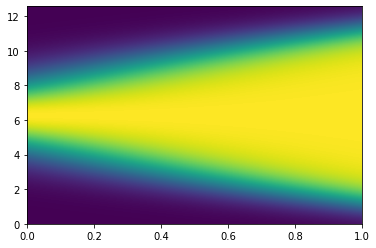

In [6]:
plt.imshow(u_ref.T, extent=[0, 1, 0, 2 * np.pi*2], aspect='auto')

# Comparing Results

In [7]:
"""
Helper function for computing l1 relative error. 

INPUT: 
- prediction: numpy array of predictions from the model
- target: numpy array of ground truths
OUTPUT: 
- error: scalar; computed relative error
"""
def l1_relative_error(prediction, target): 
    return np.sum(np.abs(target-prediction)) / np.sum(np.abs(target))

"""
Helper function for computing l2 relative error. 

INPUT: 
- prediction: numpy array of predictions from the model
- target: numpy array of ground truths
OUTPUT: 
- error: scalar; computed relative error
"""
def l2_relative_error(prediction, target): 
    return np.sqrt(np.sum((target-prediction)**2) / np.sum(target**2))

In [8]:
print(l1_relative_error(u[:,:-1], u_ref))
print(l2_relative_error(u[:,:-1], u_ref))

2.420996964129145e-17
6.28332931777372e-17
